<a href="https://colab.research.google.com/github/valenderval/MLA_JFV/blob/main/FinalProject_Classification_JFV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Final Project - Classification
Jacob Vallery <br>CS430-ON <br>Machine Learning in the Cloud

## Standard Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

## Imports for Splitting Data and Building Pipeline

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

## Confusion Matrix Function

In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

#ROC_Curve Function

In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

#Acquire Data -

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

iris = fetch_ucirepo(id=53)

#Statistical and Visual Exploration

In [ ]:
iris.data.features

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
iris.data.targets

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [ ]:
X = iris.data.features
y = iris.data.targets

In [ ]:
df = pd.concat([X, y], axis=1)

In [ ]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df['class'].value_counts()

,count
class,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
species_counts = df['class'].value_counts()

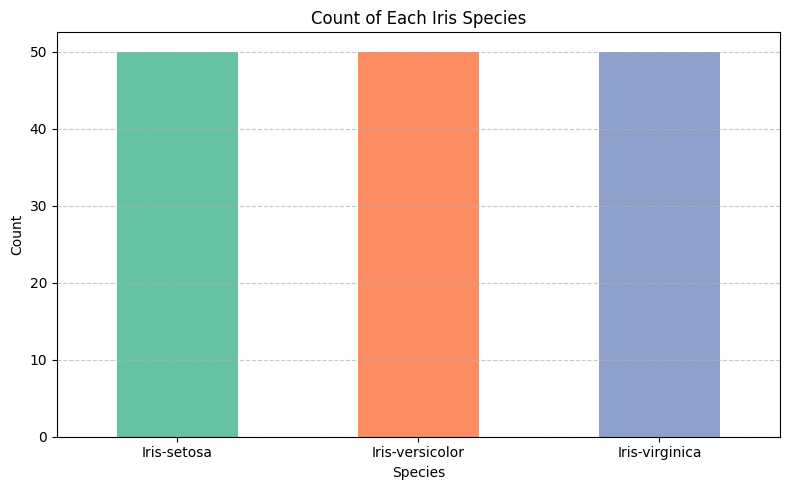

In [ ]:
plt.figure(figsize=(8, 5))
species_counts.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])

plt.title('Count of Each Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

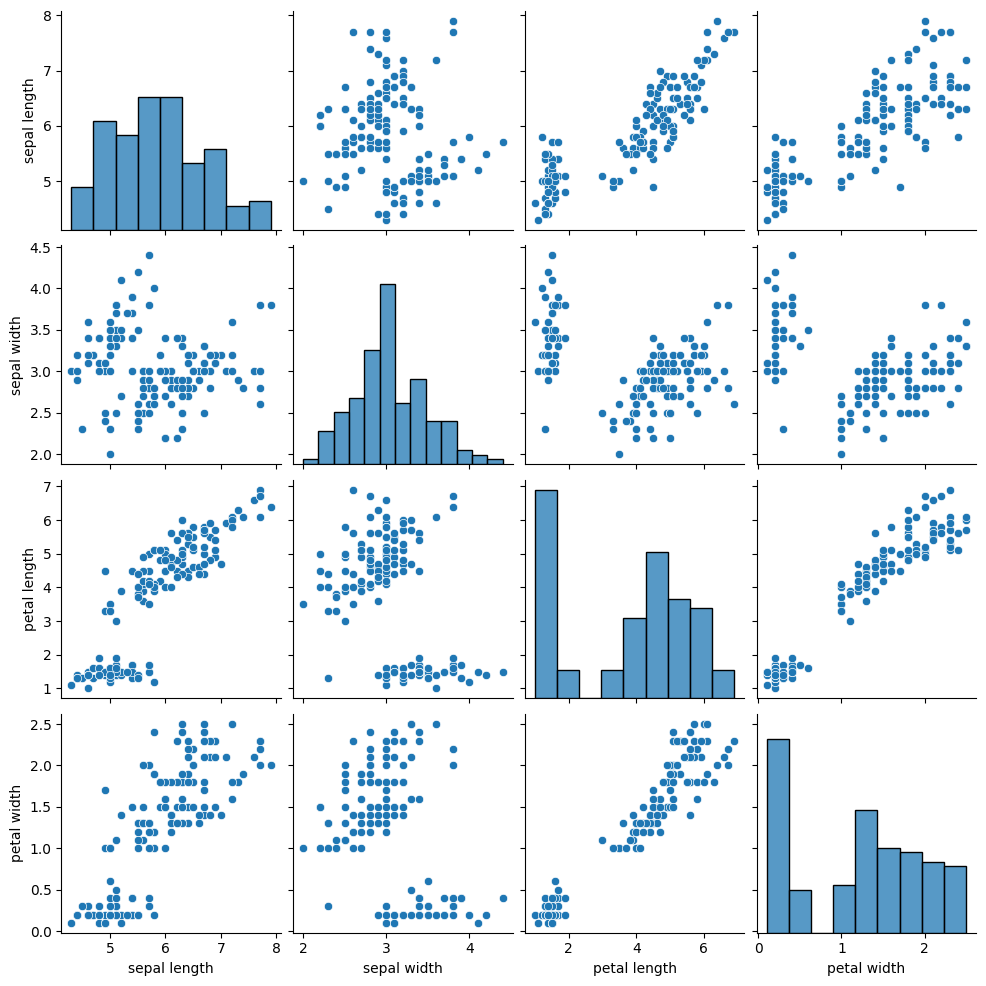

In [ ]:
sns.pairplot(df)
plt.show()

# Splitting Data into Train/Test

In [ ]:
X = iris.data.features
y = iris.data.targets

In [ ]:
X.head(2)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [ ]:
y.head(2)

,class
0,Iris-setosa
1,Iris-setosa


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=32)

#Building the Pipeline

In [ ]:
num_attribs = X_train.columns

In [ ]:
col_transform = ColumnTransformer(transformers=[
                               ('num',MinMaxScaler(), num_attribs)],
                               remainder='passthrough')

Logistic regression Pipeline

In [ ]:
pipeline = Pipeline([
                     ('trans', col_transform),
                     ('mlr', LogisticRegression(max_iter=1000)),
                     ])


Random Forest Pipeline

In [ ]:
random_forest = Pipeline([
                     ('transform', col_transform),
                     ('rf',RandomForestClassifier(n_estimators=1000, max_samples=120, bootstrap=True, n_jobs=-1))
                     ])

#Executing the Model

Logistic Regression Pipeline

In [ ]:
pipeline.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object'))])),
                ('mlr', LogisticRegression(max_iter=1000))])

GridSearch with logistic regression

In [ ]:
param_grid_lr = {
    'mlr__C': [0.1, 1, 10],                  # inverse of regularization strength
    'mlr__penalty': ['l2'],                  # l1 only works with 'liblinear' solver
    'mlr__solver': ['lbfgs', 'saga'],        # solvers that support multi-class
    'mlr__multi_class': ['auto', 'multinomial']
}

In [ ]:
grid_search_lr = GridSearchCV(pipeline, param_grid_lr, cv=5, scoring='accuracy')

In [ ]:
grid_search_lr.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object'))])),
                                       ('mlr',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'mlr__C': [0.1, 1, 10],
                         'mlr__multi_class': ['auto', 'multinomial'],
                         'mlr__penalty': ['l2'],
                         'mlr__solver': ['lbfgs', 'saga']},
             scoring='accuracy')

In [ ]:
print("Best parameters:", grid_search_lr.best_params_)
print("Best CV accuracy:", grid_search_lr.best_score_)
print("Test accuracy:", grid_search_lr.score(X_test, y_test))

Best parameters: {'mlr__C': 10, 'mlr__multi_class': 'auto', 'mlr__penalty': 'l2', 'mlr__solver': 'lbfgs'}
Best CV accuracy: 0.95
Test accuracy: 0.9666666666666667


Random Forest Pipeline

In [ ]:
random_forest.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object'))])),
                ('rf',
                 RandomForestClassifier(max_samples=120, n_estimators=1000,
                                        n_jobs=-1))])

#Evaluating the Model

Logistic Regression Predictions

In [ ]:
y_pred = pipeline.predict(X_test)

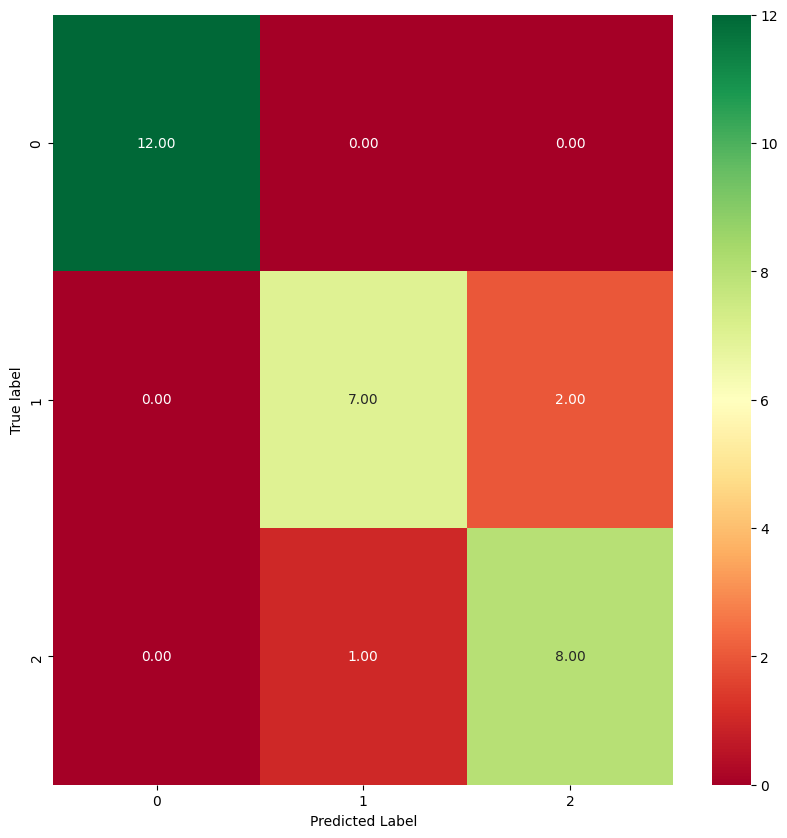

In [ ]:
plot_cm(y_test,y_pred)

In [ ]:
print(classification_report(y_pred, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.78      0.88      0.82         8
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.89      0.89      0.89        30
   weighted avg       0.90      0.90      0.90        30



GridSearch Predictions

In [ ]:
y_pred_grid = grid_search_lr.predict(X_test)

In [ ]:
print(classification_report(y_pred_grid, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
classes = grid_search_lr.best_estimator_.named_steps['mlr'].classes_
cm = confusion_matrix(y_test, y_pred_grid, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

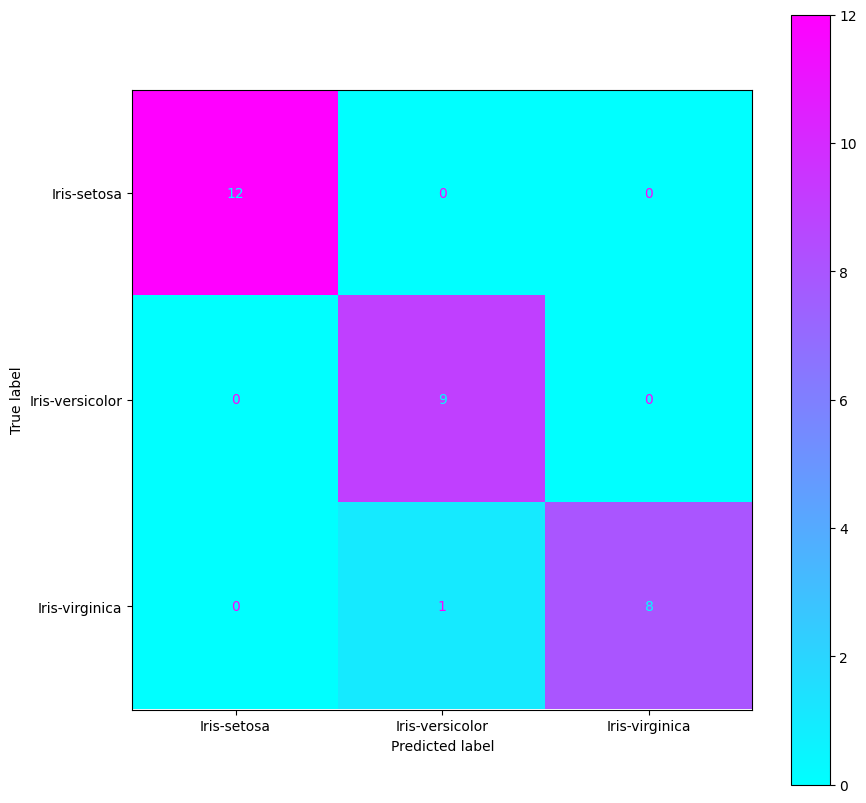

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap='cool')

Random Forest Predictions

In [ ]:
y_pred_rf = random_forest.predict(X_test)

In [ ]:
print(classification_report(y_pred_rf, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
classes = random_forest.named_steps.rf.classes_
cm = confusion_matrix(y_test, y_pred_rf, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

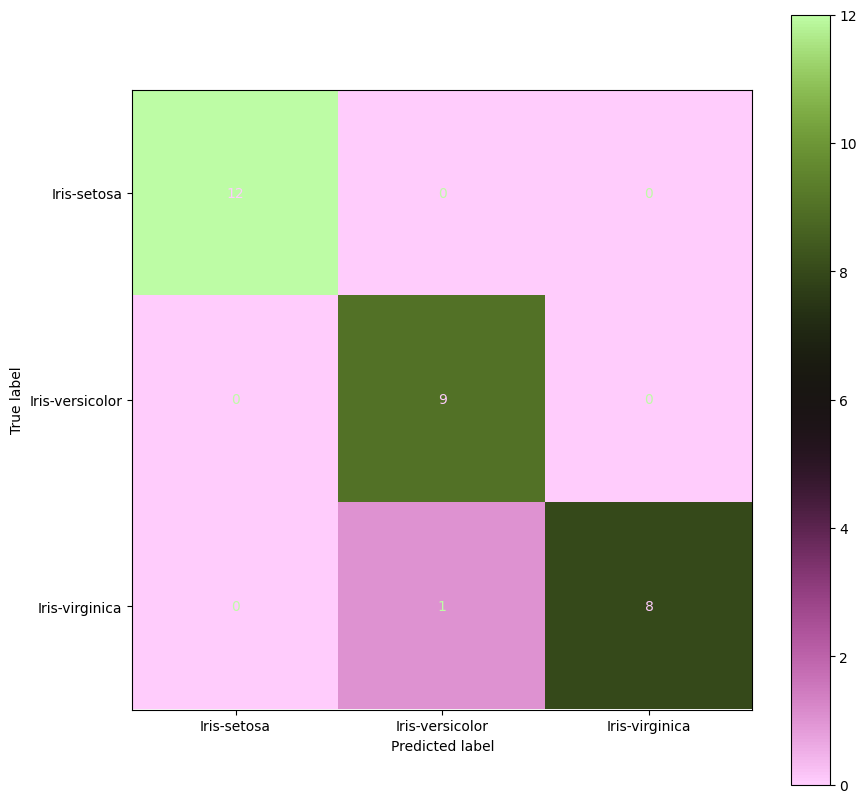

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap='vanimo')

#Conclusion

All three of the above models work very well for classifying iris species based upon measurements. The original logistic regression model performs the worst with about 90% accuracy. Implementing GridSearch into the logistic regression model greatly improved the prediction results. The Random Forest model ran predictions with the same results as Grid Search. With the weighted average of precision, recall, and f1-score all sitting at 97%, either the Random Forest model or the GridSearch model are great for classification predictions.